## 1.  Numpy arrays

In [1]:
import numpy as np

a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

The object named `a` in the cell above is called an **array**.

We used `np.arange` to define `a`; `np.arange` is like the builtin Python function `range`, except that it produces an array in place of a list.  For now you can think of an array as sequence with only one type.  You can do various sequence-like things with arrays, such as indexing by position and taking slices.

In [3]:
a[2]

2

In [4]:
a[2:5]

array([2, 3, 4])

There are some other differences between `a` and the ordinary Python sequences we have learned about, but  we can't really talk about what motivates arrays without looking at a different kind of example: The characteristic
feature of a sequence is that any item in it can unambigously be accessed by a single integer; there's a first postion and the first position has a next position associated with it.  In this sense sequences are **one-dimensional**.

In addition to 1D sequences like `a`, `numpy` also provides **2D arrays**, which are **tables of numbers**.  Here both row and column structure matter.

An example:

In [38]:
#Make a 3x5 array from the range array we used above.
LL = np.arange(15).reshape((3,5))
print(LL)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


`LL` is a 3x5 two-dimensional array.  It has 3 rows and 5 columns.

To access any given value we need two integers, a 0-based row index paired with c 0-based column index.

In [23]:
LL[2,3]

13

Contrast that with the single index we need to retrieve the same value from the original array `a`:

In [24]:
a[13]

13

So `a` has 1 **dimension**; `LL` has 2.

In [39]:
print(a)
print()
print(LL)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


#### Exercise

In the next cell an array `P` is created.

Write array-indexing expressions that retrieve the following values from `P`.

  1.  13
  2.  8
  3.  26
  
Explain why `P[2,8]`  raises an error while `P[8,2]` does not.

In [40]:
P = np.arange(27).reshape((9,3))
P

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26]])

In [6]:
P[2,2]

8

In [300]:
P[4,1]

13

In [301]:
P[2,2]

8

In [302]:
P[8,2]

26

The error message in the next cell
refers to axis 1 which is the column axis.  Since the array is 9x3 and 0-based indexing
is used for each dimension, the maximum row index is 8 and the maximum column index is 2; `P[8,2]` obeys
these limits; the example in the next cell does not.

In [303]:
P[2,8]

IndexError: index 8 is out of bounds for axis 1 with size 3

####  Different shapes for the same data

In the next cell four arrays are created, one **1D array** `a_1d` of length 15, and three 2D arrays, 
and each of the four arrays is printed.  We see some of the various ways of representing
the same sequence of numbers opened up by having
two dimensions instead of just one.

To create the first two 2D arrays, the 1D array  is **reshaped**; first into a 3 by 5 array
(array `b`; a 3 by 5 array has 3 rows and 2 columns), then into a 5 by 3 array (array `c`; a 5 by 3 array
has 5 rows and 3 columns).

Finally, we create a third 2D array `c` by transposing `b`;
note that `c` has the same 3 by 5 shape as `a`, but is distinct from it.

In [15]:
a_1d = np.arange(15)
print('a_1d\n', a_1d)
a = np.arange(15).reshape(3, 5)
print('a\n', a)
b = np.arange(15).reshape(5, 3)
print('b\n',b)
c = b.transpose()
print('c\n',c)

a_1d
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
a
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
b
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
c
 [[ 0  3  6  9 12]
 [ 1  4  7 10 13]
 [ 2  5  8 11 14]]


#### Arrays and Math

The need for 2D arrays is obvious if you've taken a linear algebra class.  They correspond to the mathematical object called a **matrix**.  One application for matrices is in solving systems of equations, and indeed numpy 2D arrays are routinely used to solve systems of equations, but this really only scratches the surface. A matrix can represent any **linear map**, and a linear map is a very general and very important mathematical idea.  Examples of linear maps include rotation in 2D and 3D space,
mappings from any coordinate system to any other coordinate system, and differentiation of polynomial
functions.

A more immediate application for matrices for a data scientist is they can represent all that is known about a single data set.  Generally each row represents an item (an individual or event in the data), and the entry in each column its value for a particular attribute. For example let's say each room in a hotel has lamps, tables, chairs, and beds, but in varying numbers.  We might represent the inventory of items in 5-room hotel with a 5x4 matrix (5 rows, 4 columns), as follows:

```
6  3 4 1
5  2 3 2
8  3 6 2
5  1 3 1
10 4 7 2
```

So the first row represents a room with 6 lamps, 3 tables, 4 chairs, and 1 bed.
Now if we represent the cost of each item as 1D cost array (or **vector**) to use the mathematical term,

```
40 175 90 450,
```

where the costs are ordered in the same way as our columns above: lamps costs, table costs, chair costs, and bed costs.  Then we can compute  the first room furnishing costs as follows:

In [26]:
6*40 + 3*175 + 4*90 + 1*450

1575

Now the computation above can also be done as the "dot product" (or "dot") of the first row of the room_matrix and the cost vector.  The dot product of two 1D arrays is just the sum of the product of the corresponding terms in the two arrays (they need to be the same length).  That is, 

```
6*40 + 3*175 + 4*90 + 1*450
```

So one way of thinking of **dot product** --- an operation of great importance in mathematics and physics (and many
other contexts) --- is just as a way of applying a particular sequence of coefficients --- 6, 3, 4, and 1 here to a particular sequence of values --- 40, 175, 90, and 450 here.  

In [10]:
room_matrix = \
np.array(
[[6,  3, 4, 1],
[5,  2, 3, 2],
[8,  3, 6, 2],
[2,  1, 3, 5]])

cost_vector = np.array([40, 175, 90, 450])

Computing the room cost for the first room:

In [23]:
room0_value = room_matrix[0,:].dot(cost_vector)
room0_value

1575

Mathematically, dot product is an operation that takes two vectors (sequences of values) and produces
a scalar (a single number).

If we ask `python` for the dot product of an M x N array A with a 1D N-array B, the result is a 1D array containing the dot product of the M rows of A with B.  Applied to our example, the dot product of the room matrix with the cost vector yields the costs of the 5 rooms.  That is, we apply the cost vector to each of the room vectors
and produce a vector containing the furnishing costs of the 5 rooms.

In [25]:
print("Room furnishings\n", room_matrix)
print("Furniture cost vector\n",cost_vector)
print("Inventory values vector\n",room_matrix.dot(cost_vector))

Room furnishings
 [[6 3 4 1]
 [5 2 3 2]
 [8 3 6 2]
 [2 1 3 5]]
Furniture cost vector
 [ 40 175  90 450]
Inventory values vector
 [1575 1720 2285 2775]


The mathematical name for what python calls the `dot` method is **matrix multiplication**.

As is often the case in Python, important binary operations
that can be computed with a method can also be computed
using an operator.  Following the convention
of arithmetic operators like `+` and `-`, the operator
is written between its two arguments. The operator symbol for matrix
multiplication is `@`, so the matrix multiplication above can also be written:

In [21]:
inventory_values = room_matrix @ cost_vector
print(inventory_values)

[1575 1720 2285 2775]


We've taken the dot product of the cost vector with each row and assembled the results into
a vector.  For instance:

In [37]:
room_matrix[0,:] @ cost_vector

1575

#### A wee bit of linear algebra 

Now suppose we knew the inventory values for each room (say, the ones just computed).  Could we
get back the cost of each furniture type?

Sure, that would amount to computing the 4 furniture cost values (call them $x_{1}$, $x_{2}$, $x_{3}$, and $x_{4}$, knowing the following facts:

$$
\begin{array}[t]{ccccccccc}
6*x_{1} & + & 3*x_{2} & + & 4*x_{3} & + &  1*x_{4} & =&  1575\\
5*x_{1} & + & 2*x_{2} & + & 3*x_{3} & + &  2*x_{4} & =&  1720\\
8*x_{1} & + & 3*x_{2} & + & 6*x_{3} & + &  2*x_{4} & =&  2285\\
2*x_{1} & + & 1*x_{2} & + & 3*x_{3} & + &  5*x_{4} & =&  2775\\
\end{array}
$$

That's enough equations to solve for 4 variables.  And we can rewrite
the equations in what's called matrix form:

$$
\left \lbrack \begin{array}{ccccccccc}
6 & 3  & 4 & 1 \\
5 & 2 & 3 &  2\\
8 & 3  & 6 &  2\\
2 & 1 & 3 & 5
\end{array}
\right \rbrack  
\,
\left \lbrack 
\begin{array}{c}
x_{1}\\
x_{2}\\
x_{3}\\
x_{4}
\end{array}
\right\rbrack  = 
\left \lbrack 
\begin{array}{c}
1575\\
1720\\
2285\\
2775
\end{array}
\right\rbrack 
$$

There's our 2D `room_matrix` array on the lefthand side and the 1D `inventory_values` array on the right
The operation being performed between `room_matrix` and $\left \lbrack 
\begin{array}{c}
x_{1}\\
x_{2}\\
x_{3}\\
x_{4}
\end{array}
\right\rbrack$
is still matrix multiplication.  So we're just looking for the vector whose matrix product
with `room_matrix`  is `inventory_values`; `numpy` can of course compute this for us:
just call the `solve` function from the `linalg` package.

In [27]:
from numpy import linalg

# Retrieving the cost vector knowing the room by room costs
# Find the vector whose matrix product with room_matrix is inventory_values.
cost_vector0 = linalg.solve(room_matrix, inventory_values)


Not every matrix equation that can be written in this form has a solution, but we know this
one does because of how we created `inventory_values` from `cost_vector`.  And sure enough
the solution found

In [28]:
cost_vector0

array([ 40., 175.,  90., 450.])

agrees pretty well with our original cost vector.

In [30]:
cost_vector

array([ 40, 175,  90, 450])

Though as often happens when we check numerical computing results
for consistency, the two results are not **quite** equal.

In [29]:
cost_vector == cost_vector0

array([False, False,  True, False])

This is due to wee imprecisions that arise in the course of computing the inverse of `room_matrix`, for example:

In [32]:
print(cost_vector0[0], cost_vector[0])

40.000000000000014 40


In a realistic scenario where you were trying to solve such a systrem of equations, you might want to check
whether a solution existed first.  Our linear algebra textbook tells that a solution exists if the determinant of the matrix is non zero.  

Again, `numpy` can compute that for us:

In [36]:
np.linalg.det(room_matrix)

-27.0

And consistent with what we already know, we see that matrix equations with this matrix do
have solutions (though they won't all have positive numbers that we can interpret as costs).

####  Arrays as Data Types

`numpy` ndimensional-arrays are a new data type to be 
added to our list of Python data types.  Like other
data types, they have their list of type-specific attributes.

Line 1 of the cell below shows `room_matrix` has shape `(5,4)`,
meaning it has two dimensions, a row dimension and a column dimension,
and the size of the row dimension is `5`  and the size of the column dimension is
`4`.  Line 2 shows it is a 2D array (`ndim = 2`).
Line 3 shows that the type of each entry is `np.int64`
a `numpy`-internal data type for integers. Line 4 shows 
how much memory each element of the array takes up (in bytes).
Line 6 shows the official `numpy`-internal data type for
2 dimensional arrays is `np.ndarray`.  That is, 1D arrays
2D arrays and higher dimensional arrays all belong
to the same type.

In [22]:
print(room_matrix.shape)
print(room_matrix.ndim)          # a is a 2D array
print(room_matrix.dtype.name)    # np.int64 maxint = 2**63 - 1
print(room_matrix.itemsize)      # Such an int takes up 8 bytes of memory
print(room_matrix.size)          # Number of elements
print(type(room_matrix))

(5, 4)
2
int64
8
20
<class 'numpy.ndarray'>


The python interpreter and the print function will print out arrays differently (Although this is an option any Python type can take, most types look the same whether they're printed by `print` or the interpreter).  Either way, arrays look different from lists.

In [17]:
# b is an array created from a list
L = [6, 7, 8]
b = np.array(L)

# print the list
print(L)

# print the array
print(b)

# This cell returns the array
b

[6, 7, 8]
[6 7 8]


array([6, 7, 8])

A sequence of sequences can be used to define a 2D-array, but since the inner sequences are rows, they must all be the same length.

In [28]:
import numpy as np
b = np.array( [ (1.5,2,3), (4,5,6) ] )
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

This is what we did to define `row_matrix` above.

Arrays can also contain complex numbers, an important property if they are to serve as the computational
versions of matrices in mathematics.   Matrices with complex numbers have important applications,
for example, in quantum mechanics.  However, we won't be making much use of this feature in this course.

In [3]:
c1 = np.array( [ [1+1j,2-3j], [3+5j,4+1j] ])
c2

array([[1.+1.j, 2.-3.j],
       [3.+5.j, 4.+1.j]])

As with real numbers, arrays with complex numbers can be decomposed into their real and imaginary parts:

In [9]:
R = np.array([[1,2],[3,4]]) 
I = np.array([[1,-3],[5,1]])

c2 = R + 1j*I
c2

array([[1.+1.j, 2.-3.j],
       [3.+5.j, 4.+1.j]])

In [10]:
print(R.dtype,I.dtype,c2.dtype)

int64 int64 complex128


#### Creating a new array ( np.zeros( ) )

A very convenient way to fill an array is to start with an array containing all 0's or 1's and then update the contents:

In [11]:
X = np.zeros( (3,4) )
X

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

The corresponding function for ones is  `np.ones()`.

In [12]:
np.ones( (3,4) )

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

For a discussion of the Python builtin function `range`,
see the **range_and_enumerate_in_python** notebook.
For now we note that its most frequent use is
to take an integer argument `n` and return an iterable range
of numbers from `0` throgh `n-1`.

This provides a convenient way to write a loop filling an array with values.

In [30]:
rows,cols = (3,4)
X = np.zeros((rows,cols))
for i in range(rows):
    for j in range(cols):
        X[i,j] = i+j
X

array([[0., 1., 2., 3.],
       [1., 2., 3., 4.],
       [2., 3., 4., 5.]])

#### Reshaping an array 

```
A.reshape((m,n))
```

means recasting the data in and `A` into
m rows and n columns.,  This means `A` has to have m x n 
cells.  Reshaping can be done on any array that has the right number
of cells.  For example, a 2D 3x4 array can be reshaped into a 6x2
array.

In [14]:
Y = np.arange(12).reshape((3,4))
print(Y,end="\n\n")
print(Y.reshape((6,2)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]


#### Indexing 2D arrays

Let's take a closer look at how arrays are indexed.

We saw above that indexing 1D arrays works exactly
like indexing lists.

Indexing 2D arrays works similarly, except that now there are two dimensions to worry about.

In [31]:
print(X)
X[0,3]  # first row, fourth col

[[0. 1. 2. 3.]
 [1. 2. 3. 4.]
 [2. 3. 4. 5.]]


3.0

In [32]:
print(X)
X[1,2]  # second row, third col

[[0. 1. 2. 3.]
 [1. 2. 3. 4.]
 [2. 3. 4. 5.]]


3.0

**Exercise**

Here is X again.

In [18]:
print(X)


[[0. 1. 2. 3.]
 [1. 2. 3. 4.]
 [2. 3. 4. 5.]]


Without executing the cell try to predict what value will be returned by the command below.  Then check
your answer.  What happened and why?

In [19]:
X[3,0]  

In [33]:
X[3,0]  

IndexError: index 3 is out of bounds for axis 0 with size 3

This expression raises an `IndexError` because it tries to access the fourth row of `X` and `X` has
no fourth row.  Notice that we accessed `X[0,3]` with no problem above, so that maximum
index that can be used for a dimension depends on the size of that dimension.  `X` has
shape 

In [22]:
X.shape

(3, 4)

so the maximum index in the row dimension is 2 and the maximum index in he column dimension is 3.

#### Indexing 2D arrays, 2D Slices

Using `a_1D` and `a` as defined above, we review 1D and 2D value retrieval:

In [35]:
a_1d = np.arange(15)
a = np.arange(15).reshape(3, 5)
print(a)
a_1d[13]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


13

In [36]:
print(a)
a[2,3]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


13

Now let's retrieve an entire subpart of array.

Here's an expression that returns the third row of `a` as a 1D array:

In [37]:
a[2,:]

array([10, 11, 12, 13, 14])

An expression that returns a splice (the first two items) of the third row of `a` as a 1D array:

In [38]:
a[2,0:2]

array([10, 11])

Further examples to study.

In [39]:
import numpy as np
X = np.arange(10,130,10).reshape((3,4))
X

array([[ 10,  20,  30,  40],
       [ 50,  60,  70,  80],
       [ 90, 100, 110, 120]])

In [40]:
fill_val = 20
print(X)
print('-'*fill_val)   # ---------------
print(X[2,3])         # value in 3rd row, 4th col.
print('-'*fill_val)   # ---------------
print(X[2,:])         # entire 3rd row
print('-'*fill_val)   # ----------------
print(X[:,2])         # entire 3rd col; note it still prints horizontally
print('-'*fill_val)   # -----------------
print(X[1:3,1:3])     # a sub array of X, also 2D

[[ 10  20  30  40]
 [ 50  60  70  80]
 [ 90 100 110 120]]
--------------------
120
--------------------
[ 90 100 110 120]
--------------------
[ 30  70 110]
--------------------
[[ 60  70]
 [100 110]]


Note that rows and columns both print out horizontally.  This is because both are 1D arrays.  Python
1D arrays don't support a distinction between being 
row vectors and column vectors, because they lack the second dimension
the distinction requires.



This is consistent with mathematical usage; the first class citizens of an $R^{n}$ vector space
are simply n-tuples of numbers; there is no additional dimension distinguishing row n-tuples from column
n-tuples.  

A distinction between row and column vectors can  be introduced by reshaping.

In [3]:
print(X[2,:])
print(X[2,:].reshape((1,4)))
print(X[2,:].reshape((4,1)))

[ 90 100 110 120]
[[ 90 100 110 120]]
[[ 90]
 [100]
 [110]
 [120]]


But then we have 2D arrays (note the extra brackets).

Another set of examples.  

In [41]:
# This cubes every element of  np.arange(10)
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

Look at the **shape** of an array to confirm how many dimensions it has:

In [5]:
a.shape

(10,)

 This is a 1D array, so it has only one shape number and a single cell is indexed by a single index.

In [6]:
a[2]

8

Attempting to access a 1D array with two indices is an `IndexError`:

In [7]:
a[2,0]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

So as a first approximation,indexing arrays works much as indexing lists does, with
the proviso that multiple indexes are needed for arrays with more than one dimension.

Some observations about slicing with 2D arrays using `Y` as defined below for an example.

In [42]:
Y = np.arange(10,160,10).reshape((3,5))

All conventions for slicing `numpy` arrays are inherited from Python slicing conventions): The following expression gives the second row of our 2D array `Y`

```
Y[1,:]
```

The following expression gives the 3rd column of `Y`:

```
Y[:,2]
```

The following expression gives a complete copy of Y

```
Y[:,:]
```

As a convenience, `numpy` lets you skip the `:` when you want a row.  In other words, the next two expressions are synonyms.  Note that you **need** the `:` if you want a column.

In [43]:
print(Y[1,:])
print(Y[1])

[ 60  70  80  90 100]
[ 60  70  80  90 100]


In [6]:
print(X, end="\n\n")
print(X[1,:], X[1,:].shape) # Row. a 1D array
print(X[:,1], X[:,1].shape) # Col. a 1D array

[[0. 1. 2. 3.]
 [1. 2. 3. 4.]
 [2. 3. 4. 5.]]

[1. 2. 3. 4.] (4,)
[1. 2. 3.] (3,)


Now let's get a 2x2 subarray, consisting of the upper left hand corner of `X`, followed by the central part of the last two rows.

In [41]:
print(X)
print(X[:2,:2])
print(X[1:,1:3])

[[ 10  20  30  40]
 [ 50  60  70  80]
 [ 90 100 110 120]]
[[10 20]
 [50 60]]
[[ 60  70]
 [100 110]]


All rows and every other column (uses the "step" argument of a slice with the value 2):

In [7]:
print(X,end="\n\n")
print(X[:,::2])

[[0. 1. 2. 3.]
 [1. 2. 3. 4.]
 [2. 3. 4. 5.]]

[[0. 2.]
 [1. 3.]
 [2. 4.]]


All rows and every other column, starting at the second column.

In [8]:
print(X,end="\n\n")
print(X[:,1::2])

[[0. 1. 2. 3.]
 [1. 2. 3. 4.]
 [2. 3. 4. 5.]]

[[1. 3.]
 [2. 4.]
 [3. 5.]]


Every other row and every other column, starting at the second column.

In [44]:
print(X[::2,1::2])

[[ 20  40]
 [100 120]]


#### Exercise

Use array `V` defined in the next cell.  Write expressions to find the given slices of `V`.

```
a.                                      b.  
array([[550, 600],                      array([550, 600])
       [750, 800]])

c.                                       d.
array([[300, 350],                       array([[300, 350],
       [500, 550],                              [700, 750]])
       [700, 750],
       [900, 950]])

e.
array([[250, 350],
       [650, 750]])
```

In [12]:
V = np.arange(50,1250,50).reshape((6,4))
V

array([[  50,  100,  150,  200],
       [ 250,  300,  350,  400],
       [ 450,  500,  550,  600],
       [ 650,  700,  750,  800],
       [ 850,  900,  950, 1000],
       [1050, 1100, 1150, 1200]])

a.

In [335]:
V[2:4,2:4]

array([[550, 600],
       [750, 800]])

b.

In [336]:
V[2:3,2:4]

array([[550, 600]])

c.

In [334]:
V[1:5,1:3]

array([[300, 350],
       [500, 550],
       [700, 750],
       [900, 950]])

d.

In [332]:
V[1:5:2,1:3]

array([[300, 350],
       [700, 750]])

e.

In [333]:
V[1:5:2,::2]

array([[250, 350],
       [650, 750]])

### Transposition and Shape

The shape of an array is a fixed property, but we can use the data in an array to create a new
array with a different shape.

After reshaping, the original array retains its original shape, and  can only be indexed according to its original shape:

In [45]:
Y = np.arange(12).reshape((3,4))
Z = Y.reshape((4,3))
print("Z\n",Z)
print("Y\n",Y)
print("Y[2,3]\n",Y[2,3])
print("Z[3,2]\n",Z[3,2])
print("Y[3,2]")
print(Y[3,2])

Z
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
Y
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Y[2,3]
 11
Z[3,2]
 11
Y[3,2]


IndexError: index 3 is out of bounds for axis 0 with size 3

However, the two arrays `Z` and `Y` still share the same **data**.  We say that `Z` and `Y` are  **view** of 
the same data.   What that means is that changing `Z` also changes `Y` (and also vice versa):

In [47]:
print('Y:\n', Y)
print('Z:\n', Z)
print('  Y[1,0] = 14  ==>')
Y[1,0] = 14
print('Y\n', Y)
print('Z:\n', Z)

Y:
 [[ 0  1  2 14]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Z:
 [[ 0  1  2]
 [14  4  5]
 [ 6  7  8]
 [ 9 10 11]]
  Y[1,0] = 14  ==>
Y
 [[ 0  1  2 14]
 [14  5  6  7]
 [ 8  9 10 11]]
Z:
 [[ 0  1  2]
 [14 14  5]
 [ 6  7  8]
 [ 9 10 11]]


Another view of the same data is obtained by **transposition**.

Array transposition is sometimes a nice way to get to the 2D array you really want.  The transposition of an array `M` is called `M.T`, and the definition is that 

```
M.T[i,j] = M[j,i]
```

So if `M` is an `m` x `n` array, then `M.T` is an `n` x `m`  array.   Look at `X.T` and verify these observations.  The `m`th row of `X` becomes the `m`th column of `X.T`. The `n`th column  of `X` becomes the `n`th row of `X.T`.

Note that transposition can change the shape of an array.

In [49]:
X = np.arange(10,130,10).reshape((3,4))
print("X\n", X,"\n",X.shape)
print()

T = X.T
print("X.T\n", T,"\n",T.shape)
print()
print("X[1,2]\n",X[1,2], "\nX.T[2,1]\n",T[2,1])

X
 [[ 10  20  30  40]
 [ 50  60  70  80]
 [ 90 100 110 120]] 
 (3, 4)

X.T
 [[ 10  50  90]
 [ 20  60 100]
 [ 30  70 110]
 [ 40  80 120]] 
 (4, 3)

X[1,2]
 70 
X.T[2,1]
 70


As with reshaped arrays,  transposition gives a new array but one that shares the same data,
so that changing the transposed array also changes the original. 

In [50]:
T[1,2] = 14
print(T)
print()
print(X)

[[ 10  50  90]
 [ 20  60  14]
 [ 30  70 110]
 [ 40  80 120]]

[[ 10  20  30  40]
 [ 50  60  70  80]
 [ 90  14 110 120]]


### Assigning to slices (broadcasting)

Now in general 1D arrays are very like lists, but it is important to note
that assignment works a little differently with arrays.

In [315]:
a = np.arange(10)**3
print(a)
a[2:5]

[  0   1   8  27  64 125 216 343 512 729]


array([ 8, 27, 64])

A big difference between an array and a list is that arrays allow scalar assigments
to slices.  If the assignee slice is greater than 1x1, the assignment is "broadcast" to each of the cells in the slice (we discuss broadcasting in more detail in another `numpy` notebook).

In the next cell we demonstrate assignment to a slice.  In standard Python the value that is assigned to a slice has to be a sequence.  But in numpy it is treated as an elementwise operation, so in the next  example, we assign the value 5 to each of the positions in the splice.

Note that how many 5s there are in the result is determined by the length of the splice `a[3:6]`, so the length of the assignee array `a` remains unchanged by the assignment.

In [11]:
a = np.arange(10)**3
print(len(a), a)
print(a[3:6])
a[3:6] = 5
print(len(a), a)

10 [  0   1   8  27  64 125 216 343 512 729]
[ 27  64 125]
10 [  0   1   8   5   5   5 216 343 512 729]


An example using a slice with a "step"-size of 2

In [317]:
print(a)
print(a[0:6:2])
a[0:6:2] = -1000  
print(a)

[  0   1   8   5   5   5 216 343 512 729]
[0 8 5]
[-1000     1 -1000     5 -1000     5   216   343   512   729]


Note again: the length of the array did not change, despite the fact that we were assigning a sequence of length 1
to a span of length 3 in `a`.  To accommodate the assignment, the value `-1000` is "broadcast"
over the specified span of `a`.

This a key difference from how standard Python sequence assignment works.  There is no "broadcasting"
behavior.  Instead, the assignee sequence is shortened.

In [82]:
L = list(range(10))
print(len(L), L)
L[2:4] = [5]
print(len(L), L)

10 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
9 [0, 1, 5, 4, 5, 6, 7, 8, 9]


The bottom line  is that in a numpy assignment the length -- more generally, the shape -- of the assignee never changes. 

If `numpy` can't figure out how to broadcast the assignment to preserve shape, it raises an Exception.

In [270]:
a = np.arange(10)**3
print(len(a), a)
a[2:5] = [5,6]
print(len(a), a)

10 [  0   1   8  27  64 125 216 343 512 729]


ValueError: could not broadcast input array from shape (2,) into shape (3,)

The rules governing what shape mismatches work in assignment are known as the **rules of broadcasting**.
They are discussed in some slides and another notebook.

For now we content ourselves with a more complicated example, in which the shape of the assignee slice is
2D, but assigning a 1D value still works.

In [51]:
b = np.arange(20).reshape((5,4))

print("b\n", b,end="\n\n")
print("b[1:3,1:3]\n", b[1:3,1:3],end="\n\n")

val = 20*np.ones((2,))
print("Val\n",val,end="\n\n")

b[1:3,1:3] = val

print("b\n", b,end="\n\n")
print("b slice\n", b[1:3,1:3],end="\n\n")

b
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]

b[1:3,1:3]
 [[ 5  6]
 [ 9 10]]

Val
 [20. 20.]

b
 [[ 0  1  2  3]
 [ 4 20 20  7]
 [ 8 20 20 11]
 [12 13 14 15]
 [16 17 18 19]]

b slice
 [[20 20]
 [20 20]]



## 3 (and more) D arrays

There are also 3D arrays, which have a third dimension; each position along the third dimension defines a 2D array.

In [53]:
A =np.arange(24).reshape((2,3,4))
A

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

Think of the array beginning with 12 as a layer lying "underneath"
the array beginning with 0.

 In a 2D array, a single index slice is a row or column (a 1D array).  In a 3D array, a single index slice is a 2D array.

In [272]:
print(A)
A[1,:,:]

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

`A[1,:,:]` is the second layer.

The next slice slices off the last columns of the two layers.

In [273]:
print(A)

A[:,:,3]

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


array([[ 3,  7, 11],
       [15, 19, 23]])

The next slice slices off the last rows of the two layers.

In [275]:
print(A)
A[:,2,:]

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


array([[ 8,  9, 10, 11],
       [20, 21, 22, 23]])

And here is an array consisting of the upper left hand corners of the two layers.

In [54]:
A[:,0,0]

array([ 0, 12])

We will not be using 3D arrays much, and they will not be featured on tests.  But it's nice to know they're out there. 

An easy example of where you might want a 3D array is a color image. Specifying each pixel position in the image takes two numbers, and in a black and white image we can just have the cell at that position contain a single number representing the grayscale magnitude.  But for a color image we need three numbers, and it is very convenient for many purposes to use a third dimension for those three numbers; for example, using the third dimension for the color, and the first "layer" in the 3rd dimension for red, there is an easily retrievable 2D array representing all the "red" values for the image `I`:

```
I[:,:, 0]
```

In machine learning applications, especially in deep learning applications, 3D arrays and higher are not at all uncommon.  One reason is that it is very convenient (and efficient) to use one dimension for the batch number.  Another is that words in the input are often represented as "vectors" (1D arrays of floating point numbers).  Then

```
D[22, 12,:]
```

retrieves the word vector for the 13th word in the 23rd batch.

### "Fancy" indexing

Cook up a sequence consisting of the **indices** of the first, third, and seventh elements of an array, namely:

```
[0,2,6]
```

Now use that sequence as a **fancy** index on `X` to retrieve the first third and seventh
elements of `X`.

In [3]:
print(X)
X[[0,2,6]]

[ 1  5  2  7  9  4  3 -6]


array([1, 2, 3])

So what is fancy indexing? Fancy indexing is using a sequences of indexes to return a sequence of values.  The sequence of indexes can be any sequence, a list, a tuple, an array.

Note that the option of doing fancy indexing has nothing to do with how many dimensions the array has. In this example, we used a 1D array X and passed in a sequence to retrieve 3 different values along one dimension.

So watch out for the difference between fancy indexing and indexing along multiple dimensions.

$$
\begin{array}{l|l|l}
\text{Task} &  \text{Syntax} &  \text{Returns}\\
\hline
\text{Fancy indexing} & X[[0,2,6]] & \text{A sequence of layers (3D array), rows (2D array), or values (1D array)}\\
\text{Indexing multiple dimensions} & X[0,2,6] & \text{One value from a 3D array} \text{ Error from 1D or 2D array}\\
\end{array}
$$

If we mean to fancy index but leave out a pair of brackets,
that's interpreted as an attempt to index 3 dimensions of `X`,
which is an error if `X` is not a 3D array.

Since our current `X` is a 1D array, this is an error.

In [4]:
X[0,2,6]

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [5]:
X

array([ 1,  5,  2,  7,  9,  4,  3, -6])

Fancy indexing can be done along any one of an array's dimensions, and multiple
dimensions can be fancy-indexed at the same time, though the fancy sequences must then be of the same length.

The following fancy-indexing
expression returns three values from `Y`, the value at `[0,1]`, `[0,3]`, and `[2,2]`.

So the pattern for 2D fancy indexing is `X[row_indices,column_indices]`.

In [96]:
Y = np.arange(12).reshape((3,4))
print(Y)
print()
print(Y[[0,0,2],[1,3, 2]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[ 1  3 10]


Below we use fancy indexing to permute the rows and columns of a 3x7 array.

In [7]:
WW =np.arange(21).reshape((7,3))
print(WW)
print()
WW_swap_rows = WW[[1,2,0,6,4,3,5],:]
print(WW_swap_rows)
print()
WW_swap_columns = WW_swap_rows[:,[1,0,2]]
print(WW_swap_columns)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]]

[[ 3  4  5]
 [ 6  7  8]
 [ 0  1  2]
 [18 19 20]
 [12 13 14]
 [ 9 10 11]
 [15 16 17]]

[[ 4  3  5]
 [ 7  6  8]
 [ 1  0  2]
 [19 18 20]
 [13 12 14]
 [10  9 11]
 [16 15 17]]


In [18]:
from sklearn.datasets import load_iris
data = load_iris()
features = data['data']
target = data['target']
type(features),type(target),features.shape

(numpy.ndarray, numpy.ndarray, (150, 4))

There are three iris species in the data; the `target` array identifies the species.

In [4]:
target[40:60]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
set(target)

{0, 1, 2}

In [6]:
target.shape

(150,)

In [22]:
features[23]

array([5.1, 3.3, 1.7, 0.5])

The species of iris 43.

In [23]:
target[23]

0

#### Example 1 (Exercise)

What are the colors telling us?  What does fancy-indexing have to do with this code?

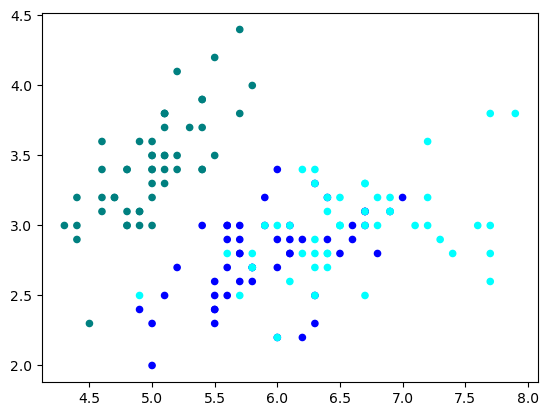

In [17]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1)
color_set = np.array(["teal","blue", "aqua"])
colors = color_set[target]
ax.scatter(features[:,0],features[:,1],c=colors,s=20)

In [20]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
color_set

array(['teal', 'blue', 'aqua'], dtype='<U4')

Species 0 gets colored teal; species 1 blue; species 2 aqua.

The indices in the `target` array are being used to (fancy-)index colors.  The colors
are aligned with the points being plotted. 



In [19]:
color_set[target]

array(['teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal',
       'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal',
       'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal',
       'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal',
       'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal',
       'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal',
       'teal', 'teal', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'aqua', 'aqua', 'aqua', 'aqua',
       'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua',
      

**Takeaway**:  We are indexing each element in an array of size 3 to produce an array of size 150 by  indexing each element many times.    This single line of code

```
color_set[target]
```

would have to be a loop in ordinary Python:

In [97]:
np.array([color_set[i] for i in target])

array(['teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal',
       'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal',
       'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal',
       'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal',
       'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal',
       'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal', 'teal',
       'teal', 'teal', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'aqua', 'aqua', 'aqua', 'aqua',
       'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua', 'aqua',
      

#### Example 2  (Exercise)

In this exercise we use fancy indexing to randomly sample from an array's values:

In [43]:
import random
# A random sample of size N from a sequence of R values
N, R = 10, 21

W =np.arange(R)

In [46]:
# Change the random seed to get a new sample
seed=12
random.seed(seed)
# randrange: select  an integer value from the range 0 through (R-1) inclusive
W[[random.randrange(0,R) for i in range(N)]]

array([15,  8, 16, 11,  4, 12,  0, 11, 15,  8])

#### task

Your task is to extend the example above: Select exactly N=10
values from the 2D array `WW` defined in the next cell.
Be sure that all 10 values are independent of each other.  For example
you should neither avoid nor be biased toward having values in
the same row.

Beyond the independence issue, note that if you only select  rows you will get 30 values, not 10, because
there are 3 columns.  If you select 3 rows you will get 9 values and  if you select 4 you will get 12.  The game is to use `select_S` to get exactly 10.

In [101]:
R = 21
WW = np.arange(R).reshape((7,3))
print("WW\n",WW)

WW
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]]


Incorrect answer: selecting 10 rows: First of all, that's 30 items not 10. 
Also note that the rows of the output are all rows of `WW`, so the individual numbers are not independent of each other.  For example, if 12 occurs it will always
be followed by 13; there is no chance that 12 will be followed by 1.

In [103]:
# Here N=10 and R is the number of rows in WW
# Sample 10 rows (with repetition, of course, since there are only 7)
N,rows = 10,7
WW[[random.randrange(0,rows) for i in range(N)]]

array([[ 0,  1,  2],
       [18, 19, 20],
       [ 3,  4,  5],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [18, 19, 20],
       [18, 19, 20],
       [18, 19, 20],
       [ 0,  1,  2],
       [ 3,  4,  5]])

We need to select N row indices as well as N column 
indices at random, using `WW`'s shape -- `rows x cols` -- to
define the ranges we are selecting from.

In [104]:
# rows,cols = (7,3) of course as determined above. 
rows,cols = WW.shape
WW[[random.randrange(0,rows) for i in range(N)],
   [random.randrange(0,cols) for i in range(N)]]


array([ 5,  3, 18, 14, 17,  2, 14, 20, 11, 18])

#### Exercise

Many machine learning algorithms are sensitive to the order in which data
is presented.  So we cannot in good conscience present our data in the 
order given in the features array, where all the items of class 0 are in the first
50 rows, class 1 in the next 50, and so on.

We need to shuffle our rows into a random order.  We can use `random.shuffle` to do this:

In [59]:
import random
a = list(np.arange(12))
print(a)
random.shuffle(a)
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 3, 8, 9, 2, 11, 10, 7, 4, 0, 5, 6]


The problem is if we shuffle `features` we must shuffle `target` in an identical
way or we will lose the information of what species each row belongs to,
making the shuffled data pretty useless.

See if you can get the effect of randomly shuffling `features` and `target` while guaranteeing that they remain aligned.  You can do this by calling
`random.seed()` twice with the same argument.  But see if you can do it another way,
by using fancy indexing.

The cell below creates copies of the original data, so you can practice
your solutions on copies and not to have to reload the data if you scramble it.
This is just a safety precaution.  The fancy-indexing solution we are looking for
here does not destructively modify either `features` or `target`.

In [105]:
features2 = features.copy()
target2 = target.copy()
# after shuffling use BC check to see that row 23 is still species 0
# >>> features[23]
# array([5.1, 3.3, 1.7, 0.5])
# These two col values are enough to uniquely determine row 23
#BC = (features2[:,0]==5.1) & (features2[:,2]==1.7)
#Create and apply BC AFTER shuffling  is implemented to do check
#BCs created before shuffling data are no longer aligned with it.

In [90]:
# The # of rows in `features` 1s the same as the # of rows in `target`
(R,D)  = features.shape
##  Shuffle a sequence of row indices
ra = np.arange(R)
random.shuffle(ra)
## Fancy indexing: Apply the same shuffled indices to features and target
new_features = features[ra]
new_target = target[ra]
#  Check former row 23 using BC
BC = (new_features[:,0]==5.1) & (new_features[:,2]==1.7)

Shuffling definitely happened:

In [95]:
new_target

array([2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 2,
       2, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 0,
       0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 1, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 0, 2])

Yep.  That's our row.

In [92]:
new_features[BC]

array([[5.1, 3.3, 1.7, 0.5]])

Still species 0 after  shuffling

In [93]:
new_target[BC]

array([0])

Checking to see the original data is unharmed.

In [94]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Obviously to be sure we'd check more rows to be sure.  But that's the idea.

Final note. We didn't use `target2` and `features2`, the copies. The copying wasn't really necessary since the solution above does not destructively modify the data.  That safety measure was in case your solution wandered down the wrong path.
`

## 3.  Elementwise arithmetic operations

We can add arrays `M` and `N` of the same shape. 

`M+N[i,j] = M[i,j] + N[i,j]`

The operation is pretty intuitive.

In [45]:
import numpy as np
a = np.array( [20,30,40,50] ).reshape((2,2))
b = np.arange( 4 ).reshape((2,2))
print(a)
print(b)

[[20 30]
 [40 50]]
[[0 1]
 [2 3]]


In [46]:
a + b

array([[20, 31],
       [42, 53]])

This is known as **elementwise arithmetic**.

It extends to other arithmetic operations beside addition.

In [ ]:
a * b

array([[  0,  30],
       [ 80, 150]])

In [ ]:
a - b

array([[20, 29],
       [38, 47]])

**Exercise**

Add 1 to every element of the the array `Q` by creating a new array of the right shape containing only 1s
(use `np.ones`, which works like `np.zeros`) and adding the two arrays.

In [9]:
Q = np.arange(0,24,2).reshape((3,4))
Q

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

Demonstrating `np.ones()`.

In [12]:
np.ones((2,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [16]:
print(Q)
print(Q + np.ones((3,4)))

[[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]]
[[ 1.  3.  5.  7.]
 [ 9. 11. 13. 15.]
 [17. 19. 21. 23.]]


In [18]:
print(Q)
print(Q + np.ones((3,4),dtype=int))

[[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]]
[[ 1  3  5  7]
 [ 9 11 13 15]
 [17 19 21 23]]


In the next example we illustrate simple **broadcasting** with arithmetic operations. We were briefly
introduced to broadcasting above for the case of assignment. 

The simplest case of broadcasting with arithmetic operations is when elementwise operations apply between arrays and scalars (ordinary numbers).  So for example, `2 * a` (where `a` is the array above) returns an array that contains all the elements of `a` multiplied by 2.

In [19]:
print(a)
print()
print(2 * a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28]


This works by "broadcasting" `2` into an array the same size as `a` and then doing elementwise mutliplication on the two arrays.  

$$
2 \Rightarrow \left \lbrack
\begin{array}{cccccccccc}
2 & 2 & 2 & 2 & 2 & 2 & 2 & 2 & 2 & 2 
\end{array}
\right \rbrack
$$

We will say more about broadcasting in a subsequent notebook.

**Exercise**

The same as the last exercise: Add 1 to every element of the the array `Q`.
Only this time, do it by adding a scalar value to `Q`.

In [55]:
Q = np.arange(0,24,2).reshape((3,4))
Q

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

In [58]:
print('Q\n',Q)
print()
print('Q+1\n',Q+1)

Q
 [[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]]

Q+1
 [[ 1  3  5  7]
 [ 9 11 13 15]
 [17 19 21 23]]


**Exercise** 

Create an array QP which contains 2 raised to every power contained in Q:

$$
\text{QP[i,j]} = 2^{\text{Q}[i,j]}
$$

In [14]:
Q

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

So for example, since `Q[2,3]` is

In [286]:
Q[2,3]

22

`QP[2,3]` should be

In [20]:
##  Note this is the general syntax for a to the b power (a**b)
2**22

4194304

In [288]:
QP = 2**Q
QP

array([[      1,       4,      16,      64],
       [    256,    1024,    4096,   16384],
       [  65536,  262144, 1048576, 4194304]])

In [289]:
QP[2,3]

4194304

## More broadcasting

A more complicated case is when we have two arrays of different shape, one `s` of shape 2x3 and the other
`t`, a 1D array of length 3.

$$
s = 
\left \lbrack
\begin{array}{ccc}
0 & 1  & 2\\
3 & 4 & 5
\end{array}\right \rbrack\\
t = 
\left \lbrack
\begin{array}[t]{ccc}
0 & 1& 2\\
\end{array}\right \rbrack\\
$$

and we broadcast `t` to be  2x3 to match `s`.


$$
\left \lbrack
\begin{array}[t]{ccc}
0 & 1& 2\\
\end{array}\right \rbrack
\Rightarrow
\left \lbrack
\begin{array}{cccc}
0 & 1& 2\\
0& 1 & 2
\end{array}
\right \rbrack
$$

Then we do elementwise arithmetic to compute $s * t$.

In [15]:
s = np.arange(6).reshape((2,3))
t = np.arange(3)
print("s\n",s)
print()
print("t\n",t)
print()
u = s * t
print("u = s * t\n",u)

s
 [[0 1 2]
 [3 4 5]]

t
 [0 1 2]

u = s * t
 [[ 0  1  4]
 [ 0  4 10]]


The result is a new array $u$ whose $i$th column is the result of multiplying the $i$th colum of $s$ ($s[:,i]$)
by the $i$th element of $t$.

Of course, you can't always rely on broadcasting to figure out what to do with all mismatched array sizes. In general, multiplying arrays of different sizes together will fail with a `ValueError` that announcing that broadcasting failed:

In [63]:
c = np.array([3,2,1,5,4])
print(f'a ({a.shape[0]:<2}, ) {a}')
print(f'c ({c.shape[0]:<2}, ) {c}')
a * c

a (10, ) [  0   1   8  27  64 125 216 343 512 729]
c (5 , ) [3 2 1 5 4]


ValueError: operands could not be broadcast together with shapes (10,) (5,) 

**Exercise**

Look at the array `Q` defined in the next cell.

Create a new array that is just like `Q` except that the values in `Q`'s first column are multiplied
by 2, the values in `Q`'s second column are multiplied by 4,
the values in `Q`'s third column are multiplied by 8,
and the values in `Q's` 4th columns are multiplied by 16

In [339]:
Q = np.arange(0,24,2).reshape((3,4))
Q

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

In [21]:
#Answer 1
print(Q)
print()
print(Q * np.array([2,4,8,16]))

[[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]]

[[  0   8  32  96]
 [ 16  40  96 224]
 [ 32  72 160 352]]


In [22]:
# Answer 2
print(Q)
print()
powers = 2**np.arange(1,5)
print(powers)
print()
print(Q * powers)

[[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]]

[ 2  4  8 16]

[[  0   8  32  96]
 [ 16  40  96 224]
 [ 32  72 160 352]]


Exercise.  Produce a 2-column array whose first column contains the result of adding the first two columns of `X` (defined above)  and whose second column contains the
result of adding the last two columns of `X`.

In others words, sinc e `X` is

```
[[ 10  20  30  40]
 [ 50  60  70  80]
 [ 90 100 110 120]]
```

the result we want is:

```
array([[ 30,  70],
       [110, 150],
       [190, 230]])
```

Hint:  this can be done in a single step  with by adding two distinct slices of `X`.   Th slices will
will involve using a step-size otehr than one. 

Reviewing step-slicing on a different exampl:

In [17]:
Q

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

In [19]:
Q[:,::2]

array([[ 0,  4],
       [ 8, 12],
       [16, 20]])

In [20]:
Q[:,1::2]

array([[ 2,  6],
       [10, 14],
       [18, 22]])

In [23]:
print(X)
print(X[:,::2])
print(X[:,1::2])
print()
X[:,::2] + X[:,1::2]

[[ 10  20  30  40]
 [ 50  60  70  80]
 [ 90 100 110 120]]
[[ 10  30]
 [ 50  70]
 [ 90 110]]
[[ 20  40]
 [ 60  80]
 [100 120]]



array([[ 30,  70],
       [110, 150],
       [190, 230]])

The next example illustrates an idea closely related to elementwise arithmetic, the idea of a **universal function**
(or **ufunc**).

This term refers to a function that is fundamentally numerical
but which can be applied to an array of numbers; the application of the function to an array
is interpreted as elementwise application of the function.  For example,  where $M$ is a 2D array,

$$
\sin(\text{M})
$$

denotes a 2D array such that

$$
\sin(\text{M})[i,j] = \sin(M[i,j]).
$$

In [21]:
# For next problem
#SQUARE ROOT OF 3 DIVIDED BY 2
print(f"{(3**.5)/2:.8e}")

8.66025404e-01


We take the sin of an array consisting of 0, $\pi / 3$, $2\pi / 3$, and $\pi$.

The takeaway here is that we get the result of applying `np.sin` to each
of the numbers in the array.

That should be an array containing $0, \sqrt{3}/2, \sqrt{3}/2,$ and $0$.  

And it is, given that we're computing with a computer.

Note that the last value in the result is just a very a tiny
float (order $10^{-16}$).

In [16]:
a = np.arange(0,(4/3)*np.pi,np.pi/3)
print("a\n",a)
print("sin(a)\n",np.sin(a))

a
 [0.         1.04719755 2.0943951  3.14159265]
sin(a)
 [0.00000000e+00 8.66025404e-01 8.66025404e-01 1.22464680e-16]


On this case we say the function is ***vectorized***, that is generalized from
a function that applies to numbers to a function that applies to
***vectors of numbers*** (in fact, any array of numbers, 1D, 2D, and beyond).

Ass noted above, such functions are also called **Ufunc**s (or universal functions) in numpy.

The next example combines the idea of scalar multiplication of arrays with a universal function
We apply two operations to `a`: first `sin`, then multiplication by 10.

In [132]:
10*np.sin(a)

array([0.00000000e+00, 8.66025404e+00, 8.66025404e+00, 1.22464680e-15])

## Elementwise Boolean tests

One extremely important application of the idea of  a vectorized operation is Boolean conditions or tests.

In `numpy`, all Boolean conditions are vectorized.  Applying a Boolean condition to an array results
in an array of Booleans, computed by applying the condition to each of the elements of the array.

In [22]:
a = np.arange(0,50,10)
print(a)
Y = a < 35
print(Y)

[ 0 10 20 30 40]
[ True  True  True  True False]


The usefulness of Boolean arrays is that a Boolean array  can be used to index
an array of the same shape.  The value of such an expression is the array
of elements for which the Boolean array is True:

In [71]:
# All the elements of a that are less than 35
a[Y]

array([ 0, 10, 20, 30])

Note the shape of `a[Y]` differs from the shape of `a`; in general the number of elements returned when
indexing an array `a` with a Boolean condition is determined by the number
of elements of `a`  satisfying the condition.

A shorter version of what we just did:

In [72]:
a[a < 35]

array([ 0, 10, 20, 30])

This is the idiomatic way of saying:  The members of `a` less than 35.

Applying a Boolean array to select members of another array is called **Boolean masking** or **Boolean indexing**.
It is called Boolean masking the Boolean array masks over the undesired values
and lets through only those matched by a `True`. It is called Boolean indexing because the Boolean array
serves much the same purpose as a sequence of indexes picking out multiple values (see
**fancy indexing** below).

Another kind of Boolean test is `==`. 

Consider

In [3]:
import numpy as np
a = np.arange(0,50,10)
a[1] = 20
print(a)
b =  np.arange(-20,80,20)
b[-1] = 40
print(b)
print(a == b)

[ 0 20 20 30 40]
[-20   0  20  40  40]
[False False  True False  True]


Boolean tests on arrays will raise an error if applied in a context that requires a single
ambiguous Boolean result:

In [4]:
a = np.arange(0,50,10)
print(a)
b =  np.arange(-20,80,20)
print(b)
if a == b:
    print("Hi!")

[ 0 10 20 30 40]
[-20   0  20  40  60]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Of course the result of this Boolean test is not `True` or `False`.

In [5]:
a==b

array([False, False,  True, False, False])

This is what Python means by saying "The truth value of an array with more than one element is ambiguous."  Generally it's a mixture of truths and falsities, like real life.

What can be used as a test  is to ask if any of the Boolean results is true, or if all of them are.

For example:

In [6]:
# Implementing one of the suggested fixes. Change (a == b).any() to (a == b).all()
# For a different result.
if (a == b).any():
    print("Hi!")

Hi!


`a.all()` requires all the Booleans be `True` and can also serve the purposes of converting a Boolean 
vector toa single truth-value.

In [25]:
(a==b).all()

False

One final point, since we will be combining Boolean arrays with Boolean operators later in this notebook.
Boolean arrays cannot be combined with Python `and`.  Attemoting to do so
raises the same error as using them as tests in conditionals, and for the same reason;
Python `and` wants to return a single value; and Boolean arrays cannot be assigned a single Boolean
value in an unambiguous way:

In [7]:
a and b

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Elementwise Boolean operations, Masking

Let's look more closely at using Boolean arrays as masks.

Reviewing the principle:  Applying a Boolean test to an array returns an array of truth-values: Just as

```
3 + X
```

adds 3 to every element of array `X`, so

```
X > 2
```

returns an array of truth-values which tells us which elements of `X` are greater than 2.

In [2]:
import numpy as np
X = np.array([1,5,2,7,9,4,3,-6])
print(X)
print(X >= 3)

[ 1  5  2  7  9  4  3 -6]
[False  True False  True  True  True  True False]


As we saw above, Boolean arrays can be used to index other arrays.  They must be the same shape as the array
they index.   So in the simplest case:

In [31]:
print(X)
print(X[np.array([False,  True, False,  True,  True,  True,  True, False])])

[ 1  5  2  7  9  4  3 -6]
[5 7 9 4 3]


But `X>=3` is a Boolean array is a Boolean array of exactly the right shape 
to index `X`.  Hence we can use it as a mask to produce an array consisting
of exactly the members of `X` that are greater than or equal to 3.

In [32]:
print(X)
print(X>=3)
print(X[X>=3])

[ 1  5  2  7  9  4  3 -6]
[False  True False  True  True  True  True False]
[5 7 9 4 3]


We can achieve the same result with a list comprehension, but the array computation above is much faster:

In [33]:
np.array([x for x in X if x >= 3])

array([5, 7, 9, 4, 3])

Boolean arrays can also be used to **count** the number of elements in an array that satisfy some constraint. Although `len` works on arrays and could be used, `sum` is faster.  The Boolean `True` is treated as 1 and the Boolean `False` as 0, so summing a Boolean array counts
the number of occurences of `True`.  

Therefore following expression, labeled
"Solution A", correctly counts the number of elements in `X` that are greater than or equal to 3.

In [93]:
print("Solution A")
(X>=3).sum()

Solution A


5

Notice that Solution A does not have `X[X>=3]` as part of it;  on the other hand, Solution B, which follows,
does.

In [94]:
print("Solution B")
len(X[(X>=3)])

Solution B


5

Solution B computes the list of elements greater than 3, then measures its length.  Solution A computes a list
Booleans, never collects the actual list of numbers,  then adds Booleans.

So far we have
Boolean constraints can also be used to index along one dimension at a time.

In the next cell, we use Boolean constraints on the just the row dimension to
pick out the first, third, and fourth rows of array `U`.  In this case, since `U`
is 5x6, the Boolean array must have size 5.

In [108]:
U = np.arange(0,300,10).reshape((5,6))

print(U)
U[[True,False,True,True,False],:]

[[  0  10  20  30  40  50]
 [ 60  70  80  90 100 110]
 [120 130 140 150 160 170]
 [180 190 200 210 220 230]
 [240 250 260 270 280 290]]


array([[  0,  10,  20,  30,  40,  50],
       [120, 130, 140, 150, 160, 170],
       [180, 190, 200, 210, 220, 230]])

**Exercise**

In the cell below we define `X`, a 2x4 array.
Use a Boolean mask to return 
first, second and fourth columns of `X`. 

In [26]:
import random

def select_S (S,R):
    """
    Select S random ints from the given by R
    """
    return np.array([random.randrange(0,R) for i in range(S)])

seed=47
random.seed(seed)
X = select_S(8,20).reshape((2,4)) 

print(X)

[[11  2 13 17]
 [14 18 10  8]]


In [25]:
X[:,[True,True,False,True]]

array([[11,  2, 17],
       [14, 18,  8]])

## Data in the form of arrays

Many python modules that provide data do so in array form.  As an example,
we load the famous **iris data set** due to Ronald Fisher, familiar to many who've had a statistics class, but also to many who've a computer science or machine learning class in which data analysis plays a role.

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
features = data['data']
target = data['target']

The name `data` has been set to a dictionary.

In [18]:
list(data.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In the cell loading the data, the name `features` is given the value `data['data']`, which is a 2D `numpy` array
containing only numbers.

In [41]:
print(features.shape)
print(features.ndim)
print(features.dtype.name)
print(features.size)
print(type(features))
print(features[:10])

(150, 4)
2
float64
600
<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


The last thing printed is the first 10 rows of `features`.  This array represents data
about irises.  Each row represents a different iris and gives 4 measurements for that 
exemplar.  So there are 150 iris exemplars; with 4 measurements for each, that's 600 items of
data in the array (`features.size`).  The data is used for classification studies,
especially classification using multiple features to distinguish more than 2 classes.

Let's apply what we've just learnt to pick a certain subset of the data. 
The first number
in each row represents the **sepal length** of that particular iris exemplar (to be demonstrated below).

Find the flowers whose sepal length is exactly 5.

In [111]:
# 1D array: first column
first_col = features[:,0]
print(first_col == 5.0)
print((first_col == 5.0).shape)

[False False False False  True False False  True False False False False
 False False False False False False False False False False False False
 False  True  True False False False False False False False False  True
 False False False False  True False False  True False False False False
 False  True False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
(150,)


Note:  The Boolean array is a 1D array of length 150, one Boolean for each row in the data.  Any Boolean array of this size can be used to index the rows, combined with a `:` to indicate we want all columns.

In [ ]:
features[first_col == 5.0,:]

array([[5. , 3.6, 1.4, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5. , 3.5, 1.6, 0.6],
       [5. , 3.3, 1.4, 0.2],
       [5. , 2. , 3.5, 1. ],
       [5. , 2.3, 3.3, 1. ]])

So there are only 10 plants out of 150 that have sepal lengths of exactly 5.

Of course we can do this all in one step, with the same result:

In [ ]:
features[features[:,0] == 5.0,:]

array([[5. , 3.6, 1.4, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5. , 3.5, 1.6, 0.6],
       [5. , 3.3, 1.4, 0.2],
       [5. , 2. , 3.5, 1. ],
       [5. , 2.3, 3.3, 1. ]])

Notice that what we've returned is a set of rows, and that's consistent with how we've used the Boolean
mask `features[:,0] == 5.0`.  Despite that, the mask defines a condition on columns: the value in the first column
must be `5,0`.  So we're asking for the rows such that their value in the first column is 5.0.

Since we're indexing rows here, the `:` can also be left out:

In [ ]:
features[features[:,0] == 5.0]

array([[5. , 3.6, 1.4, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5. , 3.5, 1.6, 0.6],
       [5. , 3.3, 1.4, 0.2],
       [5. , 2. , 3.5, 1. ],
       [5. , 2.3, 3.3, 1. ]])

A more interesting use of Boolean array indexing is to find all the irises of a particular class, using the  `target` array defined when we loaded the data; the `target` array contains the class of each iris in the data set:

In [19]:
print(type(target))
print(target.shape)
print(set(target))
# Grab the first rows of both arrays
print(features[0], target[0])
# Grab row indexed 90 from both arrays
print(features[90], target[90])

<class 'numpy.ndarray'>
(150,)
{0, 1, 2}
[5.1 3.5 1.4 0.2] 0
[5.5 2.6 4.4 1.2] 1


As the printouts indicate , `target` is a 1D array (a **vector**) of length 150, containing only the values 0,1, and 2.  These are the three classes to which an iris can belong.  There are exactly as many entries in the `target` array as there are rows in the `features` array. For any iris, its row-index in the `features` array is the index of its class in the `target`.  Above we printed the features and target class for irises 0 and 90.

We can take advantage of this structure to find all the irises of class 1 very efficiently.
Note that `target == 1` is a Boolean array of length 150.

In [20]:
target==1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Since the size of this Boolean array is exactly the same as the number of
rows in `features`, we can use it to find the rows in `features` that represent
irises of class 1:

In [21]:
features[target==1,:].shape

(50, 4)

There are 50 rows whose class is `1`; you can verify for yourselves that are also 50 rows for classes 2 and 3.  This is a balanced data set.

Going back to the dictionary we loaded when we loaded the datset, we can
find the meanings of our 4 columns:

In [22]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

So our 4 columns have numerical data on these attributes. The column indexed 0 contains the sepal length measurement for 1 flower in our sample.  The column indexed 1 contains sepal width measurements. And so on.

We know there are three classes (0, 1, and 2). We can look up their names under the `'target_names'` key of the dictionary we got when we loaded the data.  

In [23]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

So class 0 represent the iris species `setosa`, and so on.

Here's what the entire target array looks like:

In [24]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Exercise

How many irises are there whose species is 1 and whose sepal length is greater than 5.

Advice:  An easy way to do this is to do it in two stages.  First find the set of rows of species 1, then use that array to place a condition on the sepal length. 

In [5]:
# species 1
features1 = features[target==1,:]

In [6]:

# first col
features1[:,0]

array([7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. ,
       6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
       6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6,
       5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

There are 50 flowers belonging to species 1.

In [7]:
len(features1[:,0])

50

In [8]:
# Boolean condition  on first col
features1[:,0] > 5.0

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True])

In [9]:
# rows satisfying condition
XX = features1[features1[:,0] > 5.0]

It turns out nearly all the flowers of species 1 have sepal length greater than 5.

In [10]:
len(XX)

47

In [11]:
# New smaller data table consisting of those flowers of species 1.
species1 = features[target == 1,:]
print(len(species1))
species1[species1[:,0] > 5.0,:]
print(len(species1[species1[:,0] > 5.0,:]))

50
47


Alternatively

In [12]:
print(species1[:,0] > 5.0)
sum(species1[:,0] > 5.0)

[ True  True  True  True  True  True  True False  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True]


47

A better way to do this problem.  Use a the bitwise Boolean operator `&` (and, or more, precisely,
**bitwise and**).

In [23]:
True & False

False

In [24]:
import numpy as np
np.array([True,False,True])  & \
np.array([False,True,True])

array([False, False,  True])

Also meet **bitwise or** (`|`):

In [25]:
np.array([True,False,True])  | \
np.array([False,True,True])

array([ True,  True,  True])

And **bitwise not** (~):

In [26]:
~ np.array([True,False,True])

array([False,  True, False])

For our current problem all we need is bitwise &:

In [3]:
XX2 = features[(target==1)&(features[:,0] > 5.0)]
len(XX2)

47

In [14]:
sum((target==1)&(features[:,0] > 5.0))

47

In [13]:
(XX == XX2).all()

True

Now suppose we wanted to just see the **sepal lengths** (column 0) of the target class 1 irises, and compare them to the sepal lengths of the target class 0 irises, to see if sepal lengths provided a good way of telling the two classes apart.  We could sort the values to make comparison by eyeball easier:

In [214]:
col_0_class1 = features[target==1,0]
col_0_class1.sort()
print("Class 1 sepal length\n",col_0_class1)

print()
col_0_class0 = features[target==0,0]
col_0_class0.sort()
print("Class 0 sepal length\n",col_0_class0)

Class 1 sepal length
 [4.9 5.  5.  5.1 5.2 5.4 5.5 5.5 5.5 5.5 5.5 5.6 5.6 5.6 5.6 5.6 5.7 5.7
 5.7 5.7 5.7 5.8 5.8 5.8 5.9 5.9 6.  6.  6.  6.  6.1 6.1 6.1 6.1 6.2 6.2
 6.3 6.3 6.3 6.4 6.4 6.5 6.6 6.6 6.7 6.7 6.7 6.8 6.9 7. ]

Class 0 sepal length
 [4.3 4.4 4.4 4.4 4.5 4.6 4.6 4.6 4.6 4.7 4.7 4.8 4.8 4.8 4.8 4.8 4.9 4.9
 4.9 4.9 5.  5.  5.  5.  5.  5.  5.  5.  5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.1
 5.2 5.2 5.2 5.3 5.4 5.4 5.4 5.4 5.4 5.5 5.5 5.7 5.7 5.8]


And though there is some overlap, we see that there is a tendency for the sepal length
values to be higher in class 1 than class 0.

To quantify this idea, we would of course take the mean (or average value). We could also look at which class
shows the greater variance for that attribute.

In [216]:
print(f"Class 1 sepal length: Mean {col_0_class1.mean():.3f} Var {col_0_class1.var():.3f}")
print(f"Class 0 sepal length: Mean {col_0_class0.mean():.3f} Var {col_0_class0.var():.3f}")

Class 1 sepal length: Mean 5.936 Var 0.261
Class 0 sepal length: Mean 5.006 Var 0.122


Summing up this part of the discussion of arrays: we've just illustrated one of many methods for computing
statistical and numerical properties for numpy ndimensional arrays. 
They include `.all()` and `.any()` (which we saw above),
as well as `.argmax()`, `.argmin()`, `.max()`,`.mean()`,`.std()`, `sum()`, and `var()`.

All of these return numerical or Boolean values representing aggregate properties of the array.  Aggregate properties
can be opposed to elementwise properties. It makes sense to take `sin()` of an array
element by element.  It doesn't make sense to speak of the the elementwise
average of an array.

We have also seen array modification methods like .`sort()` and `.reshape()`.  These differ
from each other in that .`sort()` modifies the array in place (which is why we didn't
need to set a variable to the result of `col_0_class1.sort()` above).

We will be using these methods and relying on the distinctions between them throughout.

## Why use arrays?

Arrays provide all kinds of indexing convenience for accessing data that
is genuinely **tabular**.  Tabular data is data that has good reason for being represented in
a table;  that is, there is good reason to think of the rows as a unit, and good reason
to think of the columns as units.  And therefore, there is good reason to think we might want
to apply some computational operations to columns and rows.  We'll explore those ideas a bit more
in a future assignment.  

All kinds of data is fundamentally tabular, as we'll see.  But although that's very important,
it's probably not the main reason why so many scientists, engineers, and data analysts use `numpy`
and other programming tools like `matlab` and `R` that provide tables, or **matrices** (the mathematical
name for a similar concept), as a fundamental data structure.  The main reason is computational efficiency.

Having a single data structure with predictable types and elementwise basic arithmetic operations makes
it possible to write very efficient ways of performing more complex operations.  The code snippet. below
demonstrates this by providing a timing comparison between two ways of computing the sum of the
squares between 0 and 999 inclusive; the first is used in computing the variable `normal_py_sec`, is the ordinary Python way of computing such a sum:  Cook up a container of those integers, square each of them and sum the result.
The second, stored in the varibale `np_sec`, uses numpy arrays.  This uses
the **dot product**  operation that we discussed above 
to multiply all the corresponding elements of two vectors (elemntwise) and
sums the result.  Using this `precompiled` fast math operation we speed the code up by a factor of about
 80 on my machine, and your results, on your various home machines will be different, but in the same ballpark.
 

In [60]:
import timeit
import numpy as np

py_sec = timeit.timeit('sum(x*x for x in range(1000))',
                              number=10000)

np_sec = timeit.timeit('na.dot(na)',
                            setup="import numpy as np; na=np.arange(1000)",
                            number=10000)

print(f"Normal Python: {py_sec:5.2f} sec")

print(f"NumPy:         {np_sec:5.2f} sec")

Normal Python:  0.65 sec
NumPy:          0.01 sec


Note that numpy arrays in and of themselves don't help.  In the code snippet below, we use elementwise arithmetic to multiply the `na` array times itself and sum the result.  This code takes around the same amount of time as the basic Python code, because it doesn't use the proper optimized operation.  

In [61]:
naive_np_sec = timeit.timeit('sum(na*na)',
                             setup="import numpy as np; na=np.arange(1000)",
                             number=10000)
print(("Naive NumPy: %f sec" % naive_np_sec))

Naive NumPy: 0.647754 sec


For example, simply changing from the builtin `sum` function to the `sum` method helps enormously:

In [62]:
better_np_sec = timeit.timeit('(na*na).sum()',
                             setup="import numpy as np; na=np.arange(1000)",
                             number=10000)
print(("Better NumPy: %f sec" % better_np_sec))

Better NumPy: 0.040649 sec


Or almost as good,  use `numpy` sum instead

In [63]:
better_np_sec = timeit.timeit('np.sum(na*na)',
                             setup="import numpy as np; na=np.arange(1000)",
                             number=10000)
print(("Better NumPy: %f sec" % better_np_sec))

Better NumPy: 0.058753 sec


The lesson here is that coding so as to  take maximum advantage of the efficiencies of `numpy` can be tricky, but if you have a good reason to be efficient, it's definitely worth some experimentation. That starts with knowing about the kinds of builtin array specific functions `numpy` offers.

A somewhat simpler example.

In [3]:
import random
import numpy as np

n = 1_000_000
x = [random.random() for _ in range(n)]
y = [random.random() for _ in range(n)]
xa = np.array(x)
ya = np.array(y)

Python list comprehension performing subtraction and the absolute value operation on numbers that are values in Python lists `x` and `y`.

In [4]:
%timeit [abs(x[i] - y[j]) \
         for i in range(1000) \
         for j in range(1000)]

121 ms ± 831 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Vectorized `abs` on a `numpy` array resulting from elementwise subtraction. Equivalent to previous
calculation.  

In [5]:
%timeit np.abs(xa[:1000, np.newaxis] - ya[:1000])

888 µs ± 3.96 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Since 121 ms is 121,000 µs, we have a speedup of 2 orders of magnitude.

In [6]:
121_000/888

136.26126126126127